In [6]:
import pandas as pd
import spoontacular as sp
# Read in api key from file
with open('api_key.txt', 'r') as f:
    api_key = f.read()

### Demo how to use functions in spoontacular.py

### Do some PCA analysis on the taste profile of 5 types of food

In [2]:
# Extract flavors from taste profile
# From dictionary to separate columns in dataframe
# flavors = ['sweetness','saltiness','sourness','bitterness','savoriness','fattiness','spiciness']
# recipeswithflavor = all_recipes.copy()
# for falvor in flavors:
#     recipeswithflavor[falvor] = all_recipes['taste_profile'].apply(lambda row: row[falvor])
# recipeswithflavor.head()

## Hypotheses
1. Desserts are sweet, Indian food is spicy, Sea food is salty, meat is fatty
2. Sweet and sour foods are actually a lot sweeter than sour
3. US Regions have a particular taste (East Coast, MidWest, West Coast)


In [53]:
# Desserts are sweet, Indian food is spicy, sea food is salty, meat is fatty, and vegetables are savory
search = ['desserts', 'indian', 'sea food', 'meat', 'vegetable']
recipes = []
for search_term in search:
    df = sp.get_recipe(search_term, api_key, number=50)
    print(len(df))
    df['type'] = search_term
    recipes.append(df)
recipes = pd.concat(recipes)


50
50
50
50
50


In [54]:
# Get taste profile from spoonacular
recipes['taste_profile'] = recipes['id'].apply(lambda row: sp.get_taste(row, api_key))

In [55]:
# Extract flavors from taste profile
flavors = ['sweetness','saltiness','sourness','bitterness','savoriness','fattiness','spiciness']
recipeswithflavor = recipes.copy()
for falvor in flavors:
    recipeswithflavor[falvor] = recipes['taste_profile'].apply(lambda row: row[falvor])


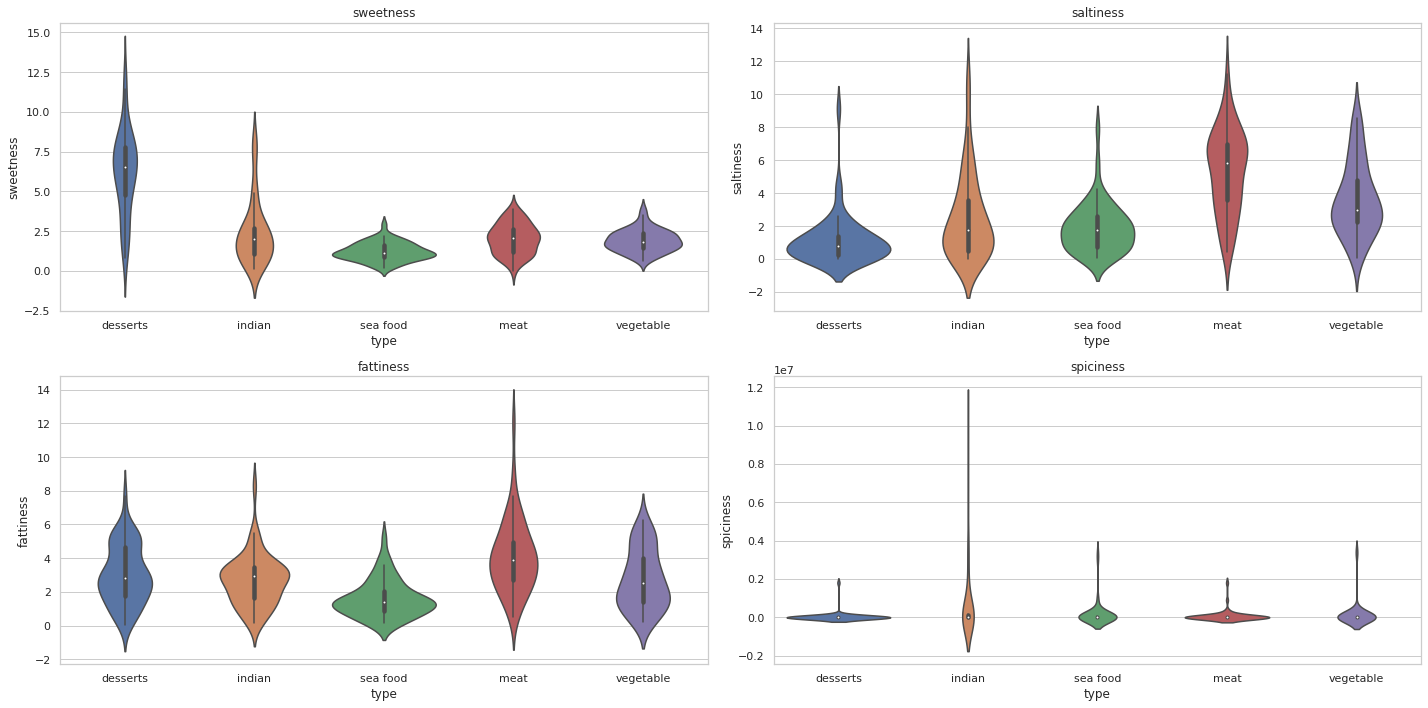

In [74]:
# 25 Violins plots
# Show the distribution of each flavor
# for flavor in flavors
# 5 plots side-by-side
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
# Create subplots of the 4 selected flavors
selected_flavors = ['sweetness', 'saltiness', 'fattiness', 'spiciness']
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
for i, flavor in enumerate(selected_flavors):
    sns.violinplot(x='type', y=flavor, data=recipeswithflavor, ax=ax[i//2, i%2])
    ax[i//2, i%2].set_title(flavor)
plt.tight_layout()
plt.show()